## 1.   Exemplo do chat gpt




###  Para a função npcdistbw do R

Em Python, as funções equivalentes às npcdistbw e npqreg do R não estão disponíveis diretamente em uma única biblioteca. No entanto, você pode usar algumas bibliotecas Python para atingir objetivos semelhantes.

Para a função npcdistbw do R, que seleciona a largura de banda ótima para a estimação de densidade não paramétrica condicional usando validação cruzada, você pode usar a biblioteca scikit-learn em conjunto com a numpy. A classe KernelDensity do scikit-learn permite ajustar a largura de banda usando a validação cruzada. Aqui está um exemplo:

In [1]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

# Exemplo de dados
X = np.random.rand(100, 2)
y = np.random.rand(100)

# Escolha de larguras de banda para testar
bandwidths = 10 ** np.linspace(-1, 1, 100)

print(bandwidths)

[ 0.1         0.10476158  0.10974988  0.1149757   0.12045035  0.12618569
  0.13219411  0.13848864  0.14508288  0.15199111  0.15922828  0.16681005
  0.17475284  0.18307383  0.19179103  0.2009233   0.21049041  0.22051307
  0.23101297  0.24201283  0.25353645  0.26560878  0.27825594  0.29150531
  0.30538555  0.31992671  0.33516027  0.35111917  0.36783798  0.38535286
  0.40370173  0.42292429  0.44306215  0.46415888  0.48626016  0.5094138
  0.53366992  0.55908102  0.58570208  0.61359073  0.64280731  0.67341507
  0.70548023  0.7390722   0.77426368  0.81113083  0.84975344  0.89021509
  0.93260335  0.97700996  1.02353102  1.07226722  1.12332403  1.17681195
  1.23284674  1.29154967  1.35304777  1.41747416  1.48496826  1.55567614
  1.62975083  1.70735265  1.78864953  1.87381742  1.96304065  2.05651231
  2.15443469  2.25701972  2.36448941  2.47707636  2.59502421  2.71858824
  2.84803587  2.98364724  3.12571585  3.27454916  3.43046929  3.59381366
  3.76493581  3.94420606  4.1320124   4.32876128  4.

In [2]:
# Procura pela melhor largura de banda usando validação cruzada
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=5)
grid.fit(X, y)

# Melhor largura de banda
best_bandwidth = grid.best_params_['bandwidth']
best_bandwidth

0.1

###  Para a função npqreg do R

Para a função npqreg do R, que ajusta um modelo de regressão quantílica não paramétrica, você pode usar a biblioteca statsmodels em Python. No entanto, a statsmodels não fornece uma implementação direta da regressão quantílica não paramétrica. Você precisará combinar a regressão quantílica fornecida pela statsmodels com uma função de kernel. Aqui está um exemplo simplificado de como fazer isso:

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Exemplo de dados
X = np.random.rand(100, 1)
y = np.random.rand(100)

# Função de kernel (por exemplo, kernel gaussiano)
def kernel(u):
    return np.exp(-0.5 * u ** 2) / np.sqrt(2 * np.pi)


In [4]:
# Matriz de design baseada em kernel
W = np.array([[kernel(x_i - x_j) for x_j in X] for x_i in X]).reshape(100, 100)
W

array([[0.39894228, 0.27092541, 0.38357552, ..., 0.38367247, 0.30442905,
        0.36163486],
       [0.27092541, 0.39894228, 0.33333337, ..., 0.33315281, 0.39480577,
        0.36267287],
       [0.38357552, 0.33333337, 0.39894228, ..., 0.39894212, 0.3596998 ,
        0.39368767],
       ...,
       [0.38367247, 0.33315281, 0.39894212, ..., 0.39894228, 0.35955184,
        0.39362961],
       [0.30442905, 0.39480577, 0.3596998 , ..., 0.35955184, 0.39894228,
        0.382266  ],
       [0.36163486, 0.36267287, 0.39368767, ..., 0.39362961, 0.382266  ,
        0.39894228]])

In [5]:
# Converter a matriz W em um DataFrame
W_df = pd.DataFrame(W)
W_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.398942,0.270925,0.383576,0.271316,0.394449,0.280355,0.308647,0.263552,0.327988,0.394233,...,0.387478,0.262426,0.370096,0.302149,0.381928,0.398409,0.276029,0.383672,0.304429,0.361635
1,0.270925,0.398942,0.333333,0.398942,0.305799,0.398627,0.393656,0.398753,0.386289,0.306599,...,0.325425,0.398691,0.353412,0.395364,0.336299,0.283157,0.398850,0.333153,0.394806,0.362673
2,0.383576,0.333333,0.398942,0.333661,0.395597,0.341109,0.362751,0.327075,0.375820,0.395779,...,0.398642,0.326106,0.396659,0.358023,0.398898,0.388656,0.337575,0.398942,0.359700,0.393688
3,0.271316,0.398942,0.333661,0.398942,0.306164,0.398652,0.393761,0.398732,0.386449,0.306963,...,0.325765,0.398667,0.353697,0.395451,0.336621,0.283542,0.398864,0.333480,0.394899,0.362932
4,0.394449,0.305799,0.395597,0.306164,0.398942,0.314552,0.339916,0.298859,0.356326,0.398940,...,0.397295,0.297792,0.387900,0.334221,0.394785,0.397000,0.310554,0.395643,0.336228,0.382223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.398409,0.283157,0.388656,0.283542,0.397000,0.292410,0.319868,0.275891,0.338324,0.396857,...,0.391823,0.274778,0.377082,0.313606,0.387286,0.398942,0.288171,0.388736,0.315807,0.369524
96,0.276029,0.398850,0.337575,0.398864,0.310554,0.398875,0.394948,0.398397,0.388311,0.311342,...,0.329840,0.398295,0.357086,0.396414,0.340468,0.288171,0.398942,0.337398,0.395941,0.366005
97,0.383672,0.333153,0.398942,0.333480,0.395643,0.340937,0.362608,0.326889,0.375703,0.395824,...,0.398656,0.325919,0.396620,0.357873,0.398892,0.388736,0.337398,0.398942,0.359552,0.393630
98,0.304429,0.394806,0.359700,0.394899,0.336228,0.396766,0.398871,0.392866,0.396557,0.336933,...,0.353139,0.392539,0.375512,0.398922,0.362117,0.315807,0.395941,0.359552,0.398942,0.382266


In [6]:
# Ajuste do modelo de regressão quantílica
quantiles = [0.25, 0.5, 0.75]
models = []
for q in quantiles:
    mod = smf.quantreg('y ~ W', pd.concat([pd.Series(y, name='y'), W_df], axis=1))
    res = mod.fit(q=q)
    models.append(res)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


## FIM

### Importando a base de dados no google drive

In [7]:
# Imports
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, FunctionTransformer, StandardScaler



In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [9]:
# https://drive.google.com/file/d/1KwlktbQQTk065-iYvwsV4nlwp0VD2x8V/view?usp=share_link
df_og = pd.read_csv('drive/My Drive/Colab Notebooks/2023/INEP-Teste-Junior-2016-Pernambuco/tbView1.csv')
df = df_og.copy()


In [10]:
# Resumo estatístico do dataset
df.describe(include='all')

,COD_ESCOLA,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,ICG_ESCOLA,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
count,1.135000e+03,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1135.000000,1084.000000,1132.000000,1135.000000,1135.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nível 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.610873e+07,45.564846,0.957621,39.273656,4.408987,9.794890,31.031894,89.749868,NaN,1.039119,6.806696,30.808811,39.850573,13.228194,8.266608,3.421956,25.813339,91.565551,6.357004
std,7.889533e+04,15.689940,2.902348,16.313095,7.047635,17.803857,9.013839,17.672228,NaN,4.122407,10.669601,22.404426,19.070014,11.973797,8.916259,0.491664,18.948628,8.235835,5.799527
min,2.600002e+07,0.000000,0.000000,0.000000,0.000000,0.000000,2.700000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,0.000000,6.700000,0.000000
25%,2.605912e+07,36.850000,0.000000,28.600000,0.000000,0.000000,26.000000,88.700000,NaN,0.000000,0.000000,12.500000,26.700000,4.300000,0.000000,3.100000,10.200000,88.450000,2.300000
50%,2.610829e+07,46.200000,0.000000,41.300000,0.000000,1.100000,32.700000,96.700000,NaN,0.000000,3.200000,27.300000,38.500000,11.100000,6.300000,3.400000,21.200000,93.600000,4.800000
75%,2.613012e+07,55.550000,0.000000,50.600000,7.100000,10.750000,37.200000,100.000000,NaN,0.000000,10.000000,45.500000,50.000000,20.000000,13.800000,3.700000,39.100000,97.100000,9.100000


In [11]:
print(f"Dimensões do dataset: {df.shape} \n")
df.info()

Dimensões do dataset: (1135, 19) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_ESCOLA  1135 non-null   int64  
 1   AFDG1       1135 non-null   float64
 2   AFDG2       1135 non-null   float64
 3   AFDG3       1135 non-null   float64
 4   AFDG4       1135 non-null   float64
 5   AFDG5       1135 non-null   float64
 6   ATU_TOTAL   1135 non-null   float64
 7   DSU_TOTAL   1135 non-null   float64
 8   ICG_ESCOLA  1135 non-null   object 
 9   NIVEL1      1135 non-null   float64
 10  NIVEL2      1135 non-null   float64
 11  NIVEL3      1135 non-null   float64
 12  NIVEL4      1135 non-null   float64
 13  NIVEL5      1135 non-null   float64
 14  NIVEL6      1135 non-null   float64
 15  IRD_ESCOLA  1084 non-null   float64
 16  TDI_TOTAL   1132 non-null   float64
 17  TAPROV      1135 non-null   float64
 18  TREPROV     1135 non-null   float

In [12]:
df.head(5)

,COD_ESCOLA,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,ICG_ESCOLA,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
0,26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,Nível 3,0.0,11.2,22.2,33.3,22.2,11.1,4.2,4.1,97.3,1.4
1,26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,Nível 4,0.0,8.3,25.0,66.7,0.0,0.0,2.5,30.4,99.6,0.4
2,26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,Nível 6,0.0,24.9,6.3,37.5,25.0,6.3,2.8,44.6,80.1,3.2
3,26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,Nível 4,0.0,0.0,31.2,50.0,12.5,6.3,3.4,33.9,91.6,7.2
4,26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,Nível 6,0.0,0.0,10.8,64.9,13.5,10.8,3.0,44.6,88.1,11.9


In [13]:
# verificando nulls no dataset
total_null = df.isnull().sum().sort_values(ascending=False)
percent_null = (total_null/df.shape[0]).sort_values(ascending=False)
print(f'{total_null} \n\n{round(percent_null*100, 2)}')


IRD_ESCOLA    51
TDI_TOTAL      3
COD_ESCOLA     0
NIVEL2         0
TAPROV         0
NIVEL6         0
NIVEL5         0
NIVEL4         0
NIVEL3         0
NIVEL1         0
AFDG1          0
ICG_ESCOLA     0
DSU_TOTAL      0
ATU_TOTAL      0
AFDG5          0
AFDG4          0
AFDG3          0
AFDG2          0
TREPROV        0
dtype: int64 

IRD_ESCOLA    4.49
TDI_TOTAL     0.26
AFDG1         0.00
AFDG2         0.00
AFDG3         0.00
AFDG4         0.00
AFDG5         0.00
ATU_TOTAL     0.00
DSU_TOTAL     0.00
ICG_ESCOLA    0.00
NIVEL1        0.00
NIVEL3        0.00
NIVEL4        0.00
NIVEL5        0.00
NIVEL6        0.00
TAPROV        0.00
NIVEL2        0.00
COD_ESCOLA    0.00
TREPROV       0.00
dtype: float64


In [14]:
df_limpo = df.copy()

In [15]:
# df_limpo.query()

In [16]:
#limpeza de dados
#df_limpo.replace(0, np.nan, inplace=True)
#df_limpo.fillna(df.median(), inplace=True)

# Contar o número de NaN antes da substituição
print("Número de NaN antes da substituição: ", df_limpo.isna().sum().sum())

# Substituir 0.0 por NaN
df_limpo.replace(0.0, np.nan, inplace=True)

# Contar o número de NaN após a substituição
print("Número de NaN após a substituição: ", df_limpo.isna().sum().sum())



Número de NaN antes da substituição:  54
Número de NaN após a substituição:  4668


In [17]:
# Gambiarra para consertar a substituição de valores que realmente são 0.0 e não são ausentes -- 
# pois na planilha eu substitui todos os -- por 0.0 mas já existiam alguns 0.0 

# Lista das colunas a serem verificadas
colunas = ['AFDG1', 'AFDG2', 'AFDG3', 'AFDG4', 'AFDG5']

# Crie uma máscara booleana indicando quais linhas têm pelo menos um valor não-NaN nas colunas especificadas
mask = df_limpo[colunas].notna().any(axis=1)

# Use essa máscara para selecionar apenas as linhas que correspondem à condição e preencha os NaN com 0.0 nessas linhas
df_limpo.loc[mask, colunas] = df_limpo.loc[mask, colunas].fillna(0.0)


# Lista das colunas a serem verificadas
colunas = ['NIVEL1', 'NIVEL2', 'NIVEL3', 'NIVEL4', 'NIVEL5', 'NIVEL6']

# Crie uma máscara booleana indicando quais linhas têm pelo menos um valor não-NaN nas colunas especificadas
mask = df_limpo[colunas].notna().any(axis=1)

# Use essa máscara para selecionar apenas as linhas que correspondem à condição e preencha os NaN com 0.0 nessas linhas
df_limpo.loc[mask, colunas] = df_limpo.loc[mask, colunas].fillna(0.0)


In [18]:
print(f"Dimensões do dataset: {df_limpo.shape} \n")
df_limpo.info()

Dimensões do dataset: (1135, 19) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_ESCOLA  1135 non-null   int64  
 1   AFDG1       1135 non-null   float64
 2   AFDG2       1135 non-null   float64
 3   AFDG3       1135 non-null   float64
 4   AFDG4       1135 non-null   float64
 5   AFDG5       1135 non-null   float64
 6   ATU_TOTAL   1135 non-null   float64
 7   DSU_TOTAL   1127 non-null   float64
 8   ICG_ESCOLA  1135 non-null   object 
 9   NIVEL1      1135 non-null   float64
 10  NIVEL2      1135 non-null   float64
 11  NIVEL3      1135 non-null   float64
 12  NIVEL4      1135 non-null   float64
 13  NIVEL5      1135 non-null   float64
 14  NIVEL6      1135 non-null   float64
 15  IRD_ESCOLA  1084 non-null   float64
 16  TDI_TOTAL   1107 non-null   float64
 17  TAPROV      1135 non-null   float64
 18  TREPROV     1012 non-null   float

In [19]:
df_limpo.head(10) 

,COD_ESCOLA,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,ICG_ESCOLA,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
0,26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,Nível 3,0.0,11.2,22.2,33.3,22.2,11.1,4.2,4.1,97.3,1.4
1,26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,Nível 4,0.0,8.3,25.0,66.7,0.0,0.0,2.5,30.4,99.6,0.4
2,26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,Nível 6,0.0,24.9,6.3,37.5,25.0,6.3,2.8,44.6,80.1,3.2
3,26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,Nível 4,0.0,0.0,31.2,50.0,12.5,6.3,3.4,33.9,91.6,7.2
4,26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,Nível 6,0.0,0.0,10.8,64.9,13.5,10.8,3.0,44.6,88.1,11.9
5,26000792,34.1,0.0,38.6,17.0,10.3,26.2,95.8,Nível 4,12.5,8.3,16.7,58.3,4.2,0.0,2.5,31.6,83.5,14.1
6,26001179,25.0,0.0,28.6,7.1,39.3,9.0,57.1,Nível 3,0.0,0.0,64.3,35.7,0.0,0.0,3.4,11.1,81.3,18.7
7,26001225,27.6,3.4,60.3,0.0,8.7,25.0,92.9,Nível 5,0.0,0.0,0.0,42.9,50.0,7.1,2.9,32.0,95.6,4.4
8,26001292,0.0,0.0,0.0,0.0,100.0,21.0,NaN,Nível 4,0.0,0.0,0.0,100.0,0.0,0.0,4.2,NaN,38.1,42.9
9,26001594,32.0,0.0,62.0,6.0,0.0,25.4,100.0,Nível 5,5.9,0.0,0.0,70.6,23.5,0.0,3.5,33.0,84.7,12.9


Código da Escola	DSUTotal
26001292	0,0
26045753	0,0
26031892	0,0
26040310	0,0
26040581	0,0
26027186	0,0
26043009	0,0
26043076	0,0



# Agora todos que ainda são NaN vão passar para a mediana

In [20]:
# dftemp = df.loc[:, ~df.columns.isin(['TREPROV', 'TREPROV'])]
# [['DSU_TOTAL', 'IRD_ESCOLA', 'TDI_TOTAL']]
# df_limpo.fillna(df.median(), inplace=True)
df_limpo[['DSU_TOTAL', 'IRD_ESCOLA', 'TDI_TOTAL']] = df_limpo[['DSU_TOTAL', 'IRD_ESCOLA', 'TDI_TOTAL']].fillna(df_limpo[['DSU_TOTAL', 'IRD_ESCOLA', 'TDI_TOTAL']].median())


df_limpo

,COD_ESCOLA,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,ICG_ESCOLA,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
0,26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,Nível 3,0.0,11.2,22.2,33.3,22.2,11.1,4.2,4.1,97.3,1.4
1,26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,Nível 4,0.0,8.3,25.0,66.7,0.0,0.0,2.5,30.4,99.6,0.4
2,26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,Nível 6,0.0,24.9,6.3,37.5,25.0,6.3,2.8,44.6,80.1,3.2
3,26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,Nível 4,0.0,0.0,31.2,50.0,12.5,6.3,3.4,33.9,91.6,7.2
4,26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,Nível 6,0.0,0.0,10.8,64.9,13.5,10.8,3.0,44.6,88.1,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,26529807,58.8,7.4,7.4,19.1,7.3,28.2,92.6,Nível 4,0.0,3.8,29.6,48.1,18.5,0.0,2.3,3.0,99.4,0.6
1131,26534711,81.0,0.0,8.5,7.8,2.7,38.6,96.9,Nível 2,0.0,12.4,59.4,18.8,9.4,0.0,4.2,0.7,98.1,1.9
1132,26540720,50.8,0.0,41.5,0.0,7.7,36.9,94.4,Nível 2,0.0,5.5,44.4,27.8,16.7,5.6,4.1,8.1,96.7,3.1
1133,26548739,82.8,13.8,0.0,0.0,3.4,14.7,97.7,Nível 5,2.3,0.0,32.6,44.2,20.9,0.0,3.1,33.3,68.3,NaN


In [21]:
print(f"Dimensões do dataset: {df_limpo.shape} \n")
df_limpo.info()

Dimensões do dataset: (1135, 19) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135 entries, 0 to 1134
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   COD_ESCOLA  1135 non-null   int64  
 1   AFDG1       1135 non-null   float64
 2   AFDG2       1135 non-null   float64
 3   AFDG3       1135 non-null   float64
 4   AFDG4       1135 non-null   float64
 5   AFDG5       1135 non-null   float64
 6   ATU_TOTAL   1135 non-null   float64
 7   DSU_TOTAL   1135 non-null   float64
 8   ICG_ESCOLA  1135 non-null   object 
 9   NIVEL1      1135 non-null   float64
 10  NIVEL2      1135 non-null   float64
 11  NIVEL3      1135 non-null   float64
 12  NIVEL4      1135 non-null   float64
 13  NIVEL5      1135 non-null   float64
 14  NIVEL6      1135 non-null   float64
 15  IRD_ESCOLA  1135 non-null   float64
 16  TDI_TOTAL   1135 non-null   float64
 17  TAPROV      1135 non-null   float64
 18  TREPROV     1012 non-null   float

In [22]:
df_limpo.head(10) 

,COD_ESCOLA,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,ICG_ESCOLA,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
0,26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,Nível 3,0.0,11.2,22.2,33.3,22.2,11.1,4.2,4.1,97.3,1.4
1,26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,Nível 4,0.0,8.3,25.0,66.7,0.0,0.0,2.5,30.4,99.6,0.4
2,26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,Nível 6,0.0,24.9,6.3,37.5,25.0,6.3,2.8,44.6,80.1,3.2
3,26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,Nível 4,0.0,0.0,31.2,50.0,12.5,6.3,3.4,33.9,91.6,7.2
4,26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,Nível 6,0.0,0.0,10.8,64.9,13.5,10.8,3.0,44.6,88.1,11.9
5,26000792,34.1,0.0,38.6,17.0,10.3,26.2,95.8,Nível 4,12.5,8.3,16.7,58.3,4.2,0.0,2.5,31.6,83.5,14.1
6,26001179,25.0,0.0,28.6,7.1,39.3,9.0,57.1,Nível 3,0.0,0.0,64.3,35.7,0.0,0.0,3.4,11.1,81.3,18.7
7,26001225,27.6,3.4,60.3,0.0,8.7,25.0,92.9,Nível 5,0.0,0.0,0.0,42.9,50.0,7.1,2.9,32.0,95.6,4.4
8,26001292,0.0,0.0,0.0,0.0,100.0,21.0,96.8,Nível 4,0.0,0.0,0.0,100.0,0.0,0.0,4.2,21.9,38.1,42.9
9,26001594,32.0,0.0,62.0,6.0,0.0,25.4,100.0,Nível 5,5.9,0.0,0.0,70.6,23.5,0.0,3.5,33.0,84.7,12.9


In [23]:
# final_df_num_cols = df_proc.select_dtypes(include='number')
# final_df_cat_cols = df_proc.select_dtypes(exclude='number')

# final_df_cat_cols.set_index(final_df_num_cols.TAB_COD, append=True, inplace=True)
# final_df_num_cols.set_index('TAB_COD', inplace=True)
# final_df_num_cols

# final_df_cat_cols = final_df_cat_cols.astype('category')
# final_df_cat_cols

# final_df_merged  = final_df_num_cols.merge(final_df_cat_cols, left_index=True, right_index=True)

# df_features = final_df_merged.copy()

# TAPROV	TREPROV
# df_proc = df_proc.astype({'ICG_NIVEL':'category'})
# df_proc.drop('ESC_UF', axis=1, inplace=True, errors='ignore')

# X = df_features.drop(['TAB_TOTAL'], axis=1)
# y = df_features['TAB_TOTAL']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,  random_state=42) 

# Separando as colunas para processar os dados

In [24]:
df_proc = df_limpo.copy()

final_df_num_cols = df_proc.select_dtypes(include='number')
final_df_cat_cols = df_proc.select_dtypes(exclude='number')

final_df_cat_cols.set_index(final_df_num_cols.COD_ESCOLA, append=True, inplace=True)
final_df_num_cols.set_index('COD_ESCOLA', inplace=True)

In [25]:
final_df_cat_cols

,,ICG_ESCOLA
,COD_ESCOLA,
0,26000016,Nível 3
1,26000024,Nível 4
2,26000261,Nível 6
3,26000636,Nível 4
4,26000741,Nível 6
...,...,...
1130,26529807,Nível 4
1131,26534711,Nível 2
1132,26540720,Nível 2


In [26]:
final_df_num_cols

,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,NIVEL1,NIVEL2,NIVEL3,NIVEL4,NIVEL5,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV
COD_ESCOLA,,,,,,,,,,,,,,,,,
26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,0.0,11.2,22.2,33.3,22.2,11.1,4.2,4.1,97.3,1.4
26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,0.0,8.3,25.0,66.7,0.0,0.0,2.5,30.4,99.6,0.4
26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,0.0,24.9,6.3,37.5,25.0,6.3,2.8,44.6,80.1,3.2
26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,0.0,0.0,31.2,50.0,12.5,6.3,3.4,33.9,91.6,7.2
26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,0.0,0.0,10.8,64.9,13.5,10.8,3.0,44.6,88.1,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26529807,58.8,7.4,7.4,19.1,7.3,28.2,92.6,0.0,3.8,29.6,48.1,18.5,0.0,2.3,3.0,99.4,0.6
26534711,81.0,0.0,8.5,7.8,2.7,38.6,96.9,0.0,12.4,59.4,18.8,9.4,0.0,4.2,0.7,98.1,1.9
26540720,50.8,0.0,41.5,0.0,7.7,36.9,94.4,0.0,5.5,44.4,27.8,16.7,5.6,4.1,8.1,96.7,3.1


# Segundo o ARTIGO, o próximo passo seria aplicar a padronização dos dados
### Mas surgiram algumas questões: 
### 1- as colunas *compositionais* (interrelacionas que somam 100%) não foram tratadas
### 2- a coluna categórica não foi tratada e não podemos aplicar padronização nela 

In [27]:
# vamos tratar o dataframe categórico: 
final_df_cat_cols = final_df_cat_cols.astype('category')
final_df_cat_cols_dummy = pd.get_dummies(final_df_cat_cols, 
                                         columns = ['ICG_ESCOLA'],  
                                         drop_first = True,
                                         prefix = 'ICG_ESCOLA')


In [28]:
final_df_cat_cols_dummy

,,ICG_ESCOLA_Nível 2,ICG_ESCOLA_Nível 3,ICG_ESCOLA_Nível 4,ICG_ESCOLA_Nível 5,ICG_ESCOLA_Nível 6
,COD_ESCOLA,,,,,
0,26000016,0,1,0,0,0
1,26000024,0,0,1,0,0
2,26000261,0,0,0,0,1
3,26000636,0,0,1,0,0
4,26000741,0,0,0,0,1
...,...,...,...,...,...,...
1130,26529807,0,0,1,0,0
1131,26534711,1,0,0,0,0
1132,26540720,1,0,0,0,0


In [29]:
final_df_merged  = final_df_num_cols.merge(final_df_cat_cols_dummy, left_index=True, right_index=True)
df_features = final_df_merged.copy()

In [30]:
# Juntando os conjuntos de dados CATEGORICOS e NUMERICOS : 
df_features

,,AFDG1,AFDG2,AFDG3,AFDG4,AFDG5,ATU_TOTAL,DSU_TOTAL,NIVEL1,NIVEL2,NIVEL3,...,NIVEL6,IRD_ESCOLA,TDI_TOTAL,TAPROV,TREPROV,ICG_ESCOLA_Nível 2,ICG_ESCOLA_Nível 3,ICG_ESCOLA_Nível 4,ICG_ESCOLA_Nível 5,ICG_ESCOLA_Nível 6
,COD_ESCOLA,,,,,,,,,,,,,,,,,,,,,
0,26000016,24.3,0.0,45.9,13.5,16.3,24.3,77.8,0.0,11.2,22.2,...,11.1,4.2,4.1,97.3,1.4,0,1,0,0,0
1,26000024,33.3,0.0,52.1,7.3,7.3,35.0,91.7,0.0,8.3,25.0,...,0.0,2.5,30.4,99.6,0.4,0,0,1,0,0
2,26000261,24.3,0.0,70.3,5.4,0.0,28.1,100.0,0.0,24.9,6.3,...,6.3,2.8,44.6,80.1,3.2,0,0,0,0,1
3,26000636,25.0,0.0,46.7,10.0,18.3,34.2,81.3,0.0,0.0,31.2,...,6.3,3.4,33.9,91.6,7.2,0,0,1,0,0
4,26000741,34.8,0.8,54.5,3.2,6.7,28.7,91.9,0.0,0.0,10.8,...,10.8,3.0,44.6,88.1,11.9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,26529807,58.8,7.4,7.4,19.1,7.3,28.2,92.6,0.0,3.8,29.6,...,0.0,2.3,3.0,99.4,0.6,0,0,1,0,0
1131,26534711,81.0,0.0,8.5,7.8,2.7,38.6,96.9,0.0,12.4,59.4,...,0.0,4.2,0.7,98.1,1.9,1,0,0,0,0
1132,26540720,50.8,0.0,41.5,0.0,7.7,36.9,94.4,0.0,5.5,44.4,...,5.6,4.1,8.1,96.7,3.1,1,0,0,0,0


### Trabalhando primeiro com REPROVACAO

In [31]:
# Deletando a coluna de APROVACAO
df_features_reprov = df_features.drop('TAPROV',axis=1)

# Deletando a coluna de REPROVACAO
df_features_aprov = df_features.drop('TREPROV',axis=1)


# Agora, segundo o artigo, seria para aplicar o Random Forest para seleção de variáveis: 
### Sendo que para aprovacao ficaram as variáveis: TDI, AFD1, ATU, AFD3, AFD5 
### E para reprovação ficaram as seguintes: TDI, AFD3, ATU, AFD1, IRD

In [32]:
selected_columns = ['TDI_TOTAL', 'AFDG3', 'ATU_TOTAL', 'AFDG1', 'IRD_ESCOLA', 'TREPROV']
final_reprov_df = df_features_reprov[selected_columns]

In [33]:
final_reprov_df

,,TDI_TOTAL,AFDG3,ATU_TOTAL,AFDG1,IRD_ESCOLA,TREPROV
,COD_ESCOLA,,,,,,
0,26000016,4.1,45.9,24.3,24.3,4.2,1.4
1,26000024,30.4,52.1,35.0,33.3,2.5,0.4
2,26000261,44.6,70.3,28.1,24.3,2.8,3.2
3,26000636,33.9,46.7,34.2,25.0,3.4,7.2
4,26000741,44.6,54.5,28.7,34.8,3.0,11.9
...,...,...,...,...,...,...,...
1130,26529807,3.0,7.4,28.2,58.8,2.3,0.6
1131,26534711,0.7,8.5,38.6,81.0,4.2,1.9
1132,26540720,8.1,41.5,36.9,50.8,4.1,3.1


In [34]:
final_reprov_df.query("`TREPROV` >= 0")

,,TDI_TOTAL,AFDG3,ATU_TOTAL,AFDG1,IRD_ESCOLA,TREPROV
,COD_ESCOLA,,,,,,
0,26000016,4.1,45.9,24.3,24.3,4.2,1.4
1,26000024,30.4,52.1,35.0,33.3,2.5,0.4
2,26000261,44.6,70.3,28.1,24.3,2.8,3.2
3,26000636,33.9,46.7,34.2,25.0,3.4,7.2
4,26000741,44.6,54.5,28.7,34.8,3.0,11.9
...,...,...,...,...,...,...,...
1128,26525933,18.2,33.1,32.4,59.1,3.7,15.2
1129,26528711,9.5,5.5,21.0,83.6,3.9,3.2
1130,26529807,3.0,7.4,28.2,58.8,2.3,0.6


In [35]:
final_reprov_df.query("`TREPROV` >= 0").to_excel('final_reprov_df.xlsx')

In [36]:
final_reprov_df = final_reprov_df.query("`TREPROV` >= 0").copy()

In [37]:
final_reprov_df

,,TDI_TOTAL,AFDG3,ATU_TOTAL,AFDG1,IRD_ESCOLA,TREPROV
,COD_ESCOLA,,,,,,
0,26000016,4.1,45.9,24.3,24.3,4.2,1.4
1,26000024,30.4,52.1,35.0,33.3,2.5,0.4
2,26000261,44.6,70.3,28.1,24.3,2.8,3.2
3,26000636,33.9,46.7,34.2,25.0,3.4,7.2
4,26000741,44.6,54.5,28.7,34.8,3.0,11.9
...,...,...,...,...,...,...,...
1128,26525933,18.2,33.1,32.4,59.1,3.7,15.2
1129,26528711,9.5,5.5,21.0,83.6,3.9,3.2
1130,26529807,3.0,7.4,28.2,58.8,2.3,0.6


In [38]:
# Separação em conjuntos de treino e teste
X = final_reprov_df.drop('TREPROV',axis=1)
y = final_reprov_df['TREPROV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state=42) 

In [39]:
print('Número de linhas em X_train: ', X_train.shape[0])
print('Número de linhas em y_train: ', y_train.shape[0])


Número de linhas em X_train:  910
Número de linhas em y_train:  910


In [40]:
# padronização dos dados 
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

# padronização dos dados 
rescaledX_test = scaler.transform(X_test)

In [41]:
rescaledX

array([[ 0.27008878,  0.97036924,  1.47031864, -0.42568498,  0.15652844],
       [ 1.21301688,  0.17469908,  0.27605909,  0.70746717,  0.57795117],
       [-0.28360737,  0.97036924,  0.21253464, -0.66944446, -1.10773974],
       ...,
       [-0.61801792,  2.32806039, -1.89647692, -1.53907285,  2.26364207],
       [ 0.67576715,  0.19364361, -0.63869292,  0.12112681, -1.52916246],
       [ 0.24816022, -0.4757297 ,  0.4920422 , -0.16874932, -0.68631701]])

In [42]:
print('Número de linhas em rescaledX: ', rescaledX.shape[0])
print('Número de linhas em y_train: ', y_train.shape[0])

Número de linhas em rescaledX:  910
Número de linhas em y_train:  910


# 0 - Baseline de problemas de regressão

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

# Carregar o dataset Boston Housing
# boston = datasets.load_boston()
# X, y = boston.data, boston.target
X = final_reprov_df.drop('TREPROV',axis=1)
y = final_reprov_df['TREPROV']

# Dividir o dataset em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Calcular a média do valor alvo no conjunto de treinamento
mean_train = np.mean(y_train)

# Criar um modelo de baseline que sempre prevê a média
y_pred_baseline = np.full(shape=y_test.shape, fill_value=mean_train)

# Calcular o erro quadrático médio do modelo de baseline
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
print(f'MSE do modelo de baseline: {mse_baseline}')

mae = mean_absolute_error(y_test, y_pred_baseline)
print('Erro Médio Absoluto (MAE): ', mae)

actual_minus_predicted = sum((y_test - y_pred_baseline)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

MSE do modelo de baseline: 21.664510154120826
Erro Médio Absoluto (MAE):  3.6916548157724627
R²: -0.019962121815080724


# 1 - Testando com KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Criação do modelo KNN para regressão
knn = KNeighborsRegressor(n_neighbors=3)

# Treinamento do modelo com o conjunto de treino
knn.fit(rescaledX, y_train)

# Fazer previsões no conjunto de teste
y_pred = knn.predict(rescaledX_test)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print('Erro Quadrático Médio (MSE): ', mse)

# Calcular a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)
print('Raiz do Erro Quadrático Médio (RMSE): ', rmse)

# Calcular o desvio padrão das previsões
std_dev = np.std(y_pred)
print('Desvio Padrão das Previsões: ', std_dev)


Erro Médio Absoluto (MAE):  4.01437908496732
Erro Quadrático Médio (MSE):  30.170174291939
Raiz do Erro Quadrático Médio (RMSE):  5.492738323635944
Desvio Padrão das Previsões:  3.5419022657990538


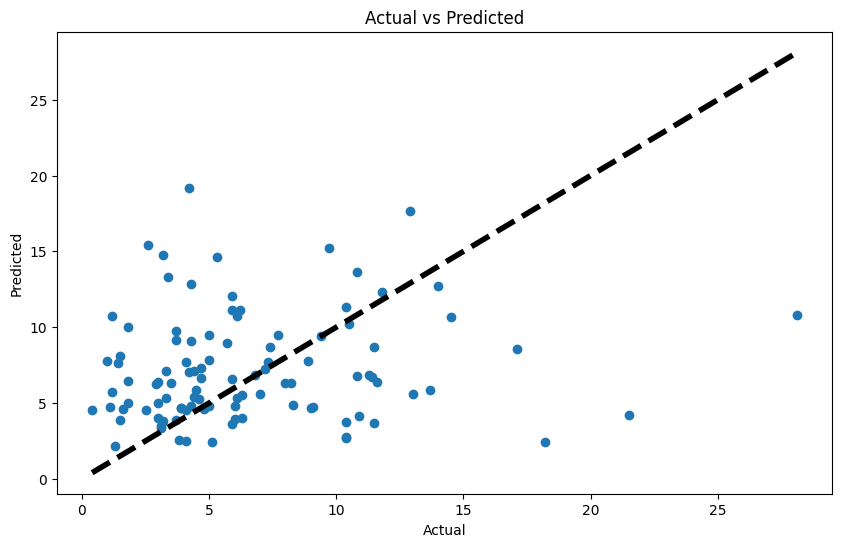

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [50]:
import pandas as pd

# supondo que y_test e y_pred sejam os seus valores de teste e previsões, respectivamente

# primeiro, é necessário garantir que y_test seja uma série do pandas ou um array 1-D
if len(y_test.shape) > 1:
    y_test = y_test.ravel()

# então, criamos um DataFrame do pandas com as colunas y_test, y_pred e a diferença absoluta entre eles
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results['Difference'] = abs(results['Actual'] - results['Predicted'])

# e aqui está a tabela
print(results)


                 Actual  Predicted  Difference
     COD_ESCOLA                               
690  26117525       1.0   7.800000    6.800000
695  26118149       6.0   3.966667    2.033333
1075 26183358       4.1   4.566667    0.466667
681  26117045       3.3   7.133333    3.833333
402  26087103       6.1  10.733333    4.633333
...                 ...        ...         ...
563  26107996       5.3  14.633333    9.333333
96   26024675       5.0   9.500000    4.500000
69   26017750       0.4   4.566667    4.166667
919  26146690       3.4  13.300000    9.900000
631  26113198      14.5  10.666667    3.833333

[102 rows x 3 columns]


# 2 - Modelo regressão quantilica "simples" (versão 1) 

In [51]:
# Criar um DataFrame a partir de rescaledX
X_train_df = pd.DataFrame(rescaledX, columns=X.columns)

In [52]:
# Criar uma Series a partir de y_train
y_train_series = pd.Series(y_train.values)


In [53]:
# Concatenar X_train_df e y_train_series em um único DataFrame
train_df = pd.concat([X_train_df, y_train_series.rename('y')], axis=1)


In [54]:
# Lista de nomes de colunas de características
feature_cols = list(X_train_df.columns)

# Criar a fórmula como uma string
formula = 'y ~ ' + ' + '.join(feature_cols)

# Ajustar o modelo de regressão quantílica
mod = smf.quantreg(formula, train_df)
res = mod.fit(q=.5)

print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04368
Model:                       QuantReg   Bandwidth:                       2.328
Method:                 Least Squares   Sparsity:                        10.72
Date:                Mon, 29 May 2023   No. Observations:                  910
Time:                        03:04:59   Df Residuals:                      904
                                        Df Model:                            5
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8876      0.178     33.141      0.000       5.539       6.236
TDI_TOTAL      1.8063      0.197      9.183      0.000       1.420       2.192
AFDG3         -0.4972      0.212     -2.343      0.019      -0.914      -0.081
ATU_TOTAL     -0.1785      0.205     -0.872      0.3

In [55]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import numpy as np

# Fazer previsões no conjunto de teste
X_test_const = sm.add_constant(X_test)  # Adicionar uma coluna de uns ao conjunto de teste
y_pred = res.predict(X_test_const)

# Calcular o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o desvio padrão das previsões
std_dev = np.std(y_pred)
print('Desvio Padrão das Previsões: ', std_dev)


Erro Médio Absoluto (MAE):  31.536627531998057
Desvio Padrão das Previsões:  30.89426403307328


# 3 - Instalando R dentro do python

In [ ]:
!pip install rpy2 #  estava dando vários erros ... 
# !pip install -Iv rpy2==3.4.2 # downgrade tb deu m...


In [ ]:
import rpy2
print(rpy2.__version__)
# 3.3.5

In [ ]:
import rpy2.situation
for row in rpy2.situation.iter_info():
    print(row)

In [ ]:
import rpy2.robjects as robjects
import rpy2.robjects.packages as rpackages

# Importar o pacote utils do R
utils = rpackages.importr('utils')

# Obter a lista de pacotes R instalados
installed_packages = utils.installed_packages().rx2('Package')

# Verificar se o pacote 'np' está na lista
if 'np' not in installed_packages:
    utils.chooseCRANmirror(ind=1)  # escolher um espelho CRAN
    utils.install_packages('np')  # instalar o pacote 'np'


# PUTZ...o chat se recusa a ajudar: agora mandou um algoritmo simples como exemplo !!! Random Forest = 

Erro Médio Absoluto (MAE):  3.7826568627450983
Desvio Padrão das Previsões:  2.210794796570948



In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Carregar o conjunto de dados
### df = pd.read_csv('https://drive.google.com/file/d/1U2GrmrgRAvvvdUvSWvWT_RANmPBktgu0/view?usp=share_link')
df = final_reprov_df.copy()


# Separação em conjuntos de treino e teste
X = final_reprov_df.drop('TREPROV',axis=1)
y = final_reprov_df['TREPROV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state=42) 


In [57]:
print('Número de linhas em X_train: ', X_train.shape[0])
print('Número de linhas em y_train: ', y_train.shape[0])

Número de linhas em X_train:  910
Número de linhas em y_train:  910


In [58]:
# Padronizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajustar o modelo de floresta aleatória
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o desvio padrão das previsões
std_dev = np.std(y_pred)
print('Desvio Padrão das Previsões: ', std_dev)
model.score(X_test, y_test)

Erro Médio Absoluto (MAE):  3.7826568627450983
Desvio Padrão das Previsões:  2.210794796570948


-0.1097198502024177

# Forçando a barra para que ocorram ajustes >>> 

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para testar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Ajustar o GridSearchCV ao conjunto de treinamento
grid_search.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros
print('Melhores hiperparâmetros: ', grid_search.best_params_)

# Ajustar o modelo de Floresta Aleatória com os melhores hiperparâmetros
model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o desvio padrão das previsões
std_dev = np.std(y_pred)
print('Desvio Padrão das Previsões: ', std_dev)


# MAIS UMA ( demorou muito, e foi cancelado )

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir os hiperparâmetros para testar ... demora horas !!
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error')

# Ajustar o GridSearchCV ao conjunto de treinamento
grid_search.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros
print('Melhores hiperparâmetros: ', grid_search.best_params_)

# Ajustar o modelo de Floresta Aleatória com os melhores hiperparâmetros
model = grid_search.best_estimator_

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calcular o erro médio absoluto (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o desvio padrão das previsões
std_dev = np.std(y_pred)
print('Desvio Padrão das Previsões: ', std_dev)


# Agora uma tentativa de regressão quantilica do python  

In [ ]:
# import statsmodels.formula.api as smf

# Ajustar o modelo de regressão quantílica
# model = smf.quantreg('TREPROV ~ TDI_TOTAL + AFDG3 + ATU_TOTAL + AFDG1 + IRD_ESCOLA', df)
# res = model.fit(q=0.5)

# Imprimir o resumo do modelo
# print(res.summary())

# Fazer previsões no conjunto de teste
# y_pred = res.predict(X_test)

# Calcular o erro médio absoluto (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print('Erro Médio Absoluto (MAE): ', mae)

# Calcular o desvio padrão das previsões
# std_dev = np.std(y_pred)
# print('Desvio Padrão das Previsões: ', std_dev)


# usando gráfico para verificar o sobreajuste e a curva de aprendizado

Training MAE: 4.1194 (0.0496)
Validation MAE: 3.8249 (0.2018)
r2 score model: -0.1244 


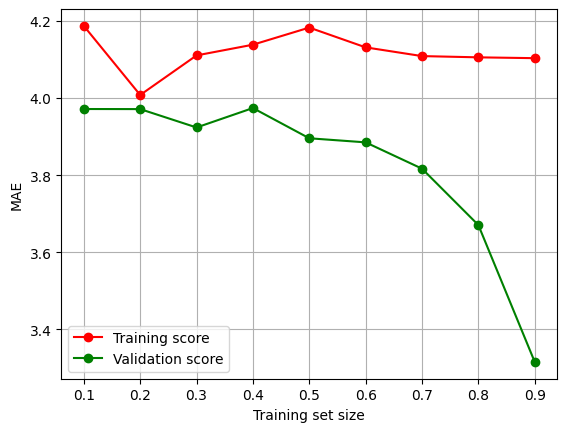

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Definir os tamanhos do conjunto de treinamento para os quais calcular o desempenho do modelo
train_sizes = np.linspace(0.1, 0.9, 9)

# Inicializar listas para armazenar os scores de treinamento e validação
train_scores = []
val_scores = []

# Loop sobre os tamanhos do conjunto de treinamento
for train_size in train_sizes:
    # Dividir os dados em conjuntos de treinamento e validação
    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=42)
    
    # Ajustar o modelo de regressão quantílica
    model = smf.quantreg('TREPROV ~ TDI_TOTAL + AFDG3 + ATU_TOTAL + AFDG1 + IRD_ESCOLA', pd.concat([X_train, y_train], axis=1))
    res = model.fit(q=0.4)
    
    # Calcular o score de treinamento (MAE)
    y_train_pred = res.predict(X_train)
    train_score = mean_absolute_error(y_train, y_train_pred)
    train_scores.append(train_score)
    
    # Calcular o score de validação (MAE)
    y_val_pred = res.predict(X_val)
    val_score = mean_absolute_error(y_val, y_val_pred)
    val_scores.append(val_score)

# Calcular o MAE médio e o desvio padrão para o treinamento e a validação
train_mae_mean = np.mean(train_scores)
train_mae_std = np.std(train_scores)
val_mae_mean = np.mean(val_scores)
val_mae_std = np.std(val_scores)

print(f'Training MAE: {train_mae_mean:.4f} ({train_mae_std:.4f})')
print(f'Validation MAE: {val_mae_mean:.4f} ({val_mae_std:.4f})')

val_r2 = r2_score(y_val, y_val_pred)
print(f'r2 score model: {val_r2:.4f} ')


# Plotar as curvas de aprendizado
plt.figure()
plt.plot(train_sizes, train_scores, 'o-', color="r", label="Training score")
plt.plot(train_sizes, val_scores, 'o-', color="g", label="Validation score")
plt.xlabel("Training set size")
plt.ylabel("MAE")
plt.legend(loc="best")
plt.grid()
plt.show()


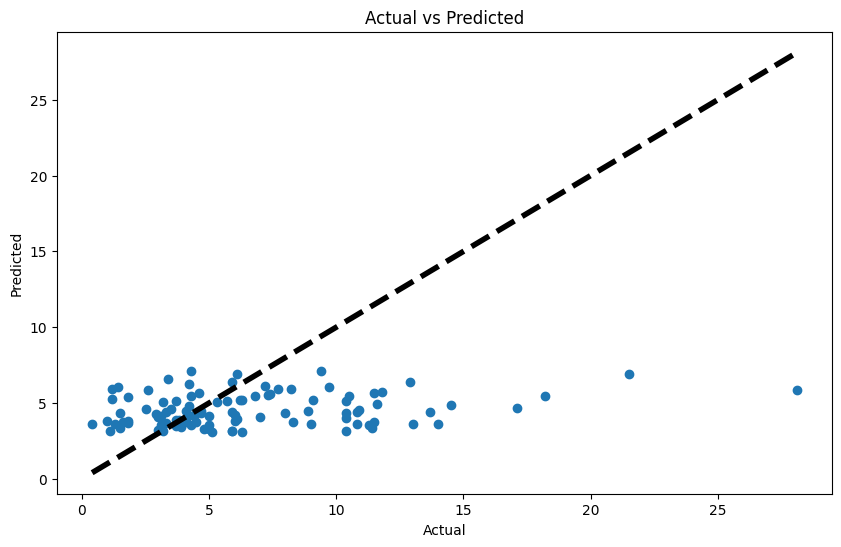

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


In [62]:
import pandas as pd

pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')


# supondo que y_val e y_val_pred sejam os seus valores de teste e previsões, respectivamente

# primeiro, é necessário garantir que y_val seja uma série do pandas ou um array 1-D
if len(y_val.shape) > 1:
    y_val = y_val.ravel()

# então, criamos um DataFrame do pandas com as colunas y_val, y_val_pred e a diferença absoluta entre eles
results = pd.DataFrame({'Actual': y_val, 'Predicted': y_val_pred})
results['Difference'] = abs(results['Actual'] - results['Predicted'])

# e aqui está a tabela
print(results)


                 Actual  Predicted  Difference
     COD_ESCOLA                               
690  26117525       1.0   3.782141    2.782141
695  26118149       6.0   3.828712    2.171288
1075 26183358       4.1   3.766695    0.333305
681  26117045       3.3   3.654432    0.354432
402  26087103       6.1   6.937284    0.837284
790  26125943      17.1   4.685114   12.414886
823  26127750       8.9   4.447923    4.452077
580  26109549       3.0   3.230449    0.230449
566  26108275      10.4   5.149419    5.250581
76   26019922      11.5   3.768798    7.731202
1057 26179997       5.0   3.576069    1.423931
479  26097370       9.7   6.038999    3.661001
1070 26182092       1.4   6.067130    4.667130
483  26097982       3.3   4.380235    1.080235
279  26058758       2.6   5.836650    3.236650
671  26116324       3.0   4.080036    1.080036
709  26120224       4.5   3.762749    0.737251
602  26110997       4.4   4.175868    0.224132
598  26110857       8.2   5.891787    2.308213
112  26027836

In [63]:
actual_minus_predicted = sum((y_val - y_val_pred)**2)
actual_minus_actual_mean = sum((y_val - y_val.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: -0.12437717963124739


In [ ]:
# model.score(X_val, y_val)

# Agora a RQNP finalmente, um exemplo completo com os dados do PDF
### NOK ... ele mentiu fizendo que tinha um modulo em python que só existe no RStudio

# Usando uma rede neural simples de 3 camadas

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar os dados em conjuntos de treino e teste
X = final_reprov_df.drop('TREPROV',axis=1)
y = final_reprov_df['TREPROV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state=42) 

# Padronizar os dados 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Definir o modelo
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Camada de entrada e primeira camada oculta
model.add(Dense(32, activation='relu'))  # Segunda camada oculta
model.add(Dense(1))  # Camada de saída

# Compilar o modelo
model.compile(loss='mean_absolute_error', optimizer='adam')

# Treinar o modelo
model.fit(X_train, y_train, epochs=90, batch_size=10, verbose=1)

# Avaliar o modelo
mae_train = model.evaluate(X_train, y_train)
mae_test = model.evaluate(X_test, y_test)

print('Erro Médio Absoluto no conjunto de treino: ', mae_train)
print('Erro Médio Absoluto no conjunto de teste: ', mae_test)


# Fazer previsões
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcular MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calcular Desvio Padrão
std_train = np.std(y_train_pred)
std_test = np.std(y_test_pred)

# Calcular R2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print('Train: MAE = %.4f, Std = %.4f, R2 = %.4f' % (mae_train, std_train, r2_train))
print('Test: MAE = %.4f, Std = %.4f, R2 = %.4f' % (mae_test, std_test, r2_test))

# Erro Médio Absoluto no conjunto de treino:  3.5793192386627197
# Erro Médio Absoluto no conjunto de teste:  3.4188451766967773


Epoch 1/90
91/91 [==============================] - 1s 1ms/step - loss: 6.3715
Epoch 2/90
91/91 [==============================] - 0s 1ms/step - loss: 4.4111
Epoch 3/90
91/91 [==============================] - 0s 1ms/step - loss: 4.1192
Epoch 4/90
91/91 [==============================] - 0s 1ms/step - loss: 4.0500
Epoch 5/90
91/91 [==============================] - 0s 1ms/step - loss: 4.0199
Epoch 6/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9983
Epoch 7/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9819
Epoch 8/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9647
Epoch 9/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9554
Epoch 10/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9466
Epoch 11/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9426
Epoch 12/90
91/91 [==============================] - 0s 1ms/step - loss: 3.9267
Epoch 13/90
91/91 [==============================

# Rede neural com Grid Search

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Função para criar o modelo, necessário para o KerasRegressor
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    return model

# Separar os dados em conjuntos de treino e teste
X = final_reprov_df.drop('TREPROV',axis=1)
y = final_reprov_df['TREPROV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,  random_state=42) 

# Padronizar os dados 
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Criar o modelo
model = KerasRegressor(build_fn=create_model, verbose=0)

# Definir os hiperparâmetros para o grid search
optimizer = ['SGD', 'Adam', 'Adamax', 'Nadam'] # 'RMSprop', 'Adagrad', 'Adadelta', 
batch_size = [10, 20, 50]  # 50, 100
epochs = [10, 50] # , 100

param_grid = dict(optimizer=optimizer, batch_size=batch_size, epochs=epochs)

# Criar o Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Sumarizar os resultados
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

# No final imprima estas métricas 
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
 print("%f (%f): %r" % (mean, stdev, param))


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()
